# <font color='blue'>Using Neural Networks to predict bike sharing</font>

This project consist in building and training a neural network to predict bike sharing usage. Dataset is available at UCIs website and contains the hourly and daily count of rental bikes between years 2011 and 2012, as well as weather and seasonal information.

References:
https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load and preview data


In [2]:
df = pd.read_csv('input/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis

Below is a description of each attribute, provided together with the dataset:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

The graph below shows a preview of number of bikes rented daily during the first 2 weeks of 2011.

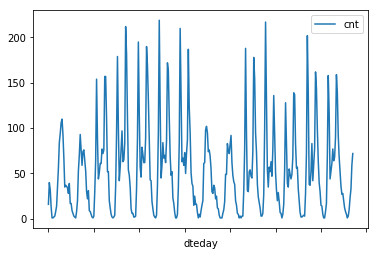

In [3]:
df[:24*14].plot(x = 'dteday', y = 'cnt')

This dataset contains only numerical values (exception: dteday). However some of them are discrete, categorical information and we will create some dummies. Those are: `season`,`weathersit`,`weekday`.

In [4]:
dummy_col = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
df = pd.get_dummies(df, columns = dummy_col, drop_first = False)
drop_list = ['instant', 'dteday', 'atemp', 'workingday']
data = df.drop(drop_list, axis = 1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


For continuous variables, we will scale them using a Pandas function

In [5]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['casual', 'registered', 'temp', 'hum', 'windspeed']

sc_x = StandardScaler()
sc_y = StandardScaler()

df_x_scaled = sc_x.fit_transform(data[numeric_features])
data[numeric_features] = df_x_scaled

df_y = np.array(data['cnt']).reshape(-1,1)
df_y_scaled = sc_y.fit_transform(df_y)
data['cnt'] = df_y_scaled

data.head()

/Users/Daniela/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Daniela/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Daniela/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Daniela/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334648,0.947372,-1.553889,-0.662755,-0.930189,-0.956339,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438516,0.895539,-1.553889,-0.561343,-0.804655,-0.824022,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438516,0.895539,-1.553889,-0.622190,-0.837690,-0.868128,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334648,0.636370,-1.553889,-0.662755,-0.950010,-0.972879,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334648,0.636370,-1.553889,-0.723603,-1.009474,-1.039037,1,0,...,0,0,0,0,0,0,0,0,0,1


### Model

In [6]:
# Split data into train and test. Here we save the last 3 weeks to be used as test set.
test_data = data[-21*24:]
train_data = data[:-21*24]

In [7]:
# Split features and target variable
target = ['cnt', 'casual', 'registered']

targets = train_data[target]
features = train_data.drop(target, axis = 1)

test_targets = test_data[target]
test_features = test_data.drop(target, axis = 1)

In [9]:
# Split train dataset into train and validation. Here we save the last 2 months to be used as validation set.
lim = -60*24

train_features = features[:lim]
train_targets = targets[:lim]

val_features = features[lim:]
val_targets = targets[lim:]

# Model

The model comprises of 2 layers, a hidden layer and the output layer

In [10]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate, verbose = False):
        
        # Define the number of nodes for each layer: input, hidden and output
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        self.verbose = verbose 
        
        if self.verbose:
            print("Your neural network has\ninput_nodes: {}\nhidden_nodes: {}\noutput_nodes: {}\nlearning_rate: {}\n".format(
                self.input_nodes, self.hidden_nodes, self.output_nodes, self.lr
            ))
        
        self.hidden_layer_activation_function = lambda x: 1 / (1 + np.exp(-x))
        self.hidden_layer_derivate_activation_function = lambda sigmoid: sigmoid * (1 - sigmoid)
        self.output_layer_activation_function = lambda x: x 
        self.output_layer_derivate_activation_function = lambda x: 1 
        
        # Activation
        self.activation_function = self.hidden_layer_activation_function 
    
    def forward_pass(self, inputs):
        
        # Forward pass #
        
        # Input layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs) 
        
        # Hidden layer
        hidden_outputs = self.hidden_layer_activation_function(hidden_inputs) 
        
        # Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs) 
        final_outputs = self.output_layer_activation_function(final_inputs)
        return [hidden_inputs, hidden_outputs, final_inputs, final_outputs]
    
    def backward_pass(self, inputs, targets, hidden_inputs, hidden_outputs, final_inputs, final_outputs):
        
        # Backward pass #
        output_errors = targets - final_outputs
        output_grad = self.output_layer_derivate_activation_function(final_outputs)
        
        # Backpropagated error
        hidden_errors = output_errors * output_grad * self.weights_hidden_to_output 
        hidden_grad = self.hidden_layer_derivate_activation_function(hidden_outputs)
            
        return [output_errors, hidden_errors, hidden_grad, output_grad]

    def train(self, inputs_list, targets_list):
        
        # Convert input list to 2D
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs, hidden_outputs, final_inputs, final_outputs = self.forward_pass(inputs)
        output_errors, hidden_errors, hidden_grad, output_grad = self.backward_pass(inputs, targets, hidden_inputs, hidden_outputs, final_inputs, final_outputs)

        # Update weights
        self.weights_hidden_to_output += self.lr * np.dot(output_errors * output_grad, hidden_outputs.T) 
        self.weights_input_to_hidden += self.lr * np.dot(hidden_errors.T * hidden_grad, inputs.T)
 
    def run(self, inputs_list):
        # Moves one pass forward
        inputs = np.array(inputs_list, ndmin = 2).T
        
        _, _, _, final_outputs = self.forward_pass(inputs)
        return final_outputs

In [11]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [12]:
import sys

# hyperparameters
epochs = 3000
learning_rate = 0.1
hidden_nodes = 27
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate, True)

losses = {'train':[], 'validation':[]}

for e in range(epochs):
    # Runs through a random batch of size 128
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.iloc[batch].values, 
                              train_targets.iloc[batch]['cnt']):
        network.train(record, target)
    
    # Print training progress
    train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
    
    val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
    
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training error:" + str(train_loss)[:5] \
                     + " ... Validation error: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Your neural network has
input_nodes: 56
hidden_nodes: 27
output_nodes: 1
learning_rate: 0.1

Progress: 99.9% ... Training error:0.053 ... Validation error: 0.227

(-0.02775612739492274, 0.5)

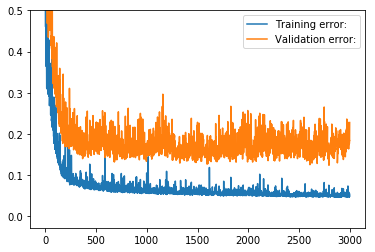

In [13]:
plt.plot(losses['train'], label = 'Training error:')
plt.plot(losses['validation'], label = 'Validation error:')
plt.legend()
plt.ylim(ymax = 0.5)

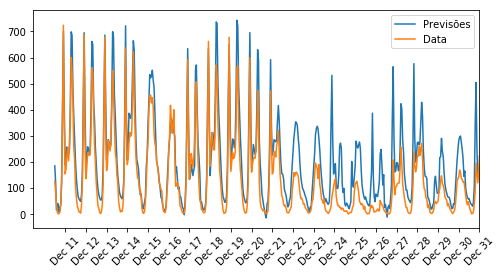

In [14]:
fig, ax = plt.subplots(figsize = (8,4))

mean, std = df['cnt'].mean(), df['cnt'].std()
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label = 'Previsões')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right = len(predictions))
ax.legend()

dates = pd.to_datetime(df.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)